In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def get_mean_std(dfs, field, length):
    arr = np.array(
            [dfs[i][field][:length] for i in range(len(dfs))])
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    
    return mean, std

In [2]:
# get the data logs as DFs

df_gp_1 = pd.read_csv("run-data/gp/1/log.csv")
df_gp_2 = pd.read_csv("run-data/gp/2/log.csv")
df_gp_3 = pd.read_csv("run-data/gp/3/log.csv")
df_gp_4 = pd.read_csv("run-data/gp/4/log.csv")
df_gp_5 = pd.read_csv("run-data/gp/5/log.csv")
dfs_gp = [df_gp_1, df_gp_2, df_gp_3, df_gp_4, df_gp_5]

df_tpgsbb_1 = pd.read_csv("run-data/tpgsbb/1/log.csv")
df_tpgsbb_2 = pd.read_csv("run-data/tpgsbb/2/log.csv")
df_tpgsbb_3 = pd.read_csv("run-data/tpgsbb/3/log.csv")
df_tpgsbb_4 = pd.read_csv("run-data/tpgsbb/4/log.csv")
dfs_tpgsbb = [df_tpgsbb_1, df_tpgsbb_2, df_tpgsbb_3, df_tpgsbb_4]

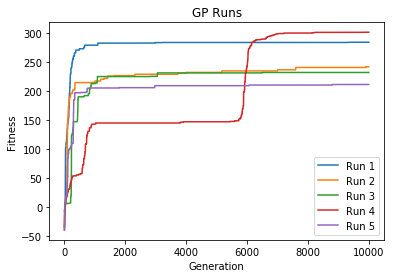

In [3]:
# GP runs
for i in range(len(dfs_gp)):
    plt.plot(dfs_gp[i]["fitness_max"].tolist()[:10000], label="Run " + str(i+1))

plt.title("GP Runs")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.savefig("images/gp-runs.pdf")
plt.show()

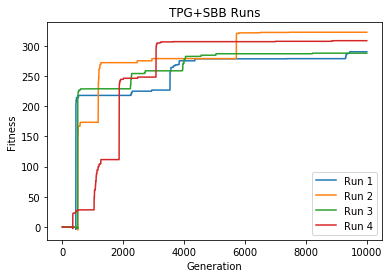

In [4]:
# TPGSBB runs
for i in range(len(dfs_tpgsbb)):
    plt.plot(dfs_tpgsbb[i]["fitness_max"].tolist()[:10000], label="Run " + str(i+1))

plt.title("TPG+SBB Runs")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.savefig("images/tpgsbb-runs.pdf")
plt.show()

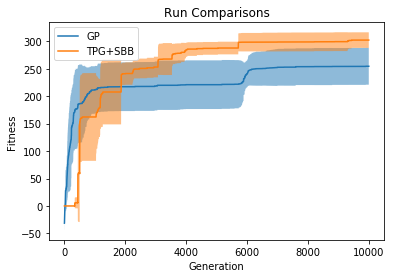

In [5]:
# comparison over average of runs with standard deviations

gp_means, gp_stds = get_mean_std(dfs_gp, "fitness_max", 10000)
tpgsbb_means, tpgsbb_stds = get_mean_std(dfs_tpgsbb, "fitness_max", 10000)

plt.plot(gp_means, label="GP")
plt.fill_between(range(10000), 
                 gp_means-gp_stds, gp_means+gp_stds,
                alpha=0.5)

plt.plot(tpgsbb_means, label="TPG+SBB")
plt.fill_between(range(10000), 
                 tpgsbb_means-tpgsbb_stds, tpgsbb_means+tpgsbb_stds,
                alpha=0.5)

plt.title("Run Comparisons")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.savefig("images/runs-compare.pdf")
plt.show()

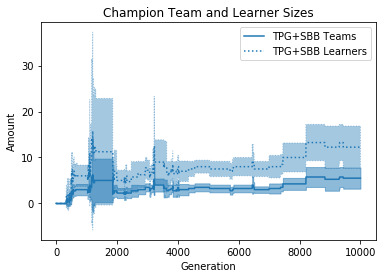

In [6]:
# comparison of champion team and learner sizes

tpgsbb_teams_means, tpgsbb_teams_stds = get_mean_std(dfs_tpgsbb, "champ_teams", 10000)
tpgsbb_learners_means, tpgsbb_learners_stds = get_mean_std(dfs_tpgsbb, "champ_learners", 10000)


plt.plot(tpgsbb_teams_means, color=colors[0], label="TPG+SBB Teams")
plt.fill_between(range(10000), 
                 tpgsbb_teams_means-tpgsbb_teams_stds, tpgsbb_teams_means+tpgsbb_teams_stds,
                alpha=0.5, color=colors[0])

plt.plot(tpgsbb_learners_means, color=colors[0], linestyle="dotted", label="TPG+SBB Learners")
plt.fill_between(range(10000), 
                 tpgsbb_learners_means-tpgsbb_learners_stds, tpgsbb_learners_means+tpgsbb_learners_stds,
                alpha=0.4, color=colors[0], linestyle="dotted")

plt.title("Champion Teams and Learners")
plt.xlabel("Generation")
plt.ylabel("Amount")
plt.legend()

plt.show()

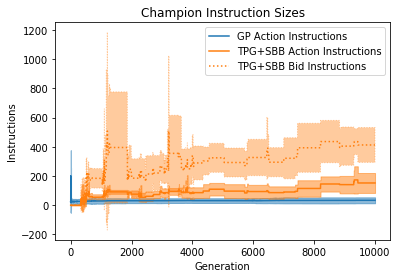

In [7]:
# comparison of champion instruction sizes

gp_act_means, gp_act_stds = get_mean_std(dfs_gp, "champ_act_instructions", 10000)

tpgsbb_act_means, tpgsbb_act_stds = get_mean_std(dfs_tpgsbb, "champ_act_instructions", 10000)
tpgsbb_bid_means, tpgsbb_bid_stds = get_mean_std(dfs_tpgsbb, "champ_instructions", 10000)


plt.plot(gp_act_means, color=colors[0], label="GP Action Instructions")
plt.fill_between(range(10000), 
                 gp_act_means-gp_act_stds, gp_act_means+gp_act_stds,
                alpha=0.5, color=colors[0])

plt.plot(tpgsbb_act_means, color=colors[1], label="TPG+SBB Action Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_act_means-tpgsbb_act_stds, tpgsbb_act_means+tpgsbb_act_stds,
                alpha=0.5, color=colors[1])

plt.plot(tpgsbb_bid_means, color=colors[1], linestyle="dotted", label="TPG+SBB Bid Instructions")
plt.fill_between(range(10000), 
                 tpgsbb_bid_means-tpgsbb_bid_stds, tpgsbb_bid_means+tpgsbb_bid_stds,
                alpha=0.4, color=colors[1], linestyle="dotted")

plt.title("Champion Instructions")
plt.xlabel("Generation")
plt.ylabel("Instructions")
plt.legend()

plt.show()

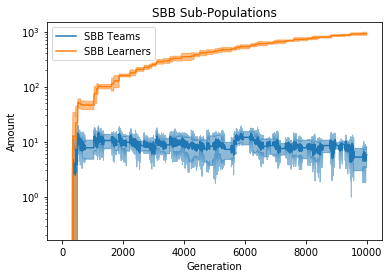

Final SBB Team Portion:  0.01592797783933518
Final SBB Learner Portion:  0.6266758336198006


In [8]:
# visualize sbb pop size over time in tpgsbb

teams_all_means, teams_all_stds = get_mean_std(dfs_tpgsbb, "b_teams", 10000)
learners_all_means, learners_all_stds = get_mean_std(dfs_tpgsbb, "b_learners", 10000)


plt.plot(teams_all_means, color=colors[0], label="SBB Teams")
plt.fill_between(range(10000), 
                 teams_all_means-teams_all_stds, teams_all_means+teams_all_stds,
                alpha=0.5, color=colors[0])

plt.plot(learners_all_means, color=colors[1], label="SBB Learners")
plt.fill_between(range(10000), 
                 learners_all_means-learners_all_stds, learners_all_means+learners_all_stds,
                alpha=0.5, color=colors[1])

plt.title("SBB Sub-Populations")
plt.xlabel("Generation")
plt.ylabel("Amount")
plt.legend()

plt.yscale("log")
plt.savefig("images/tpgsbb-subpops.pdf")
plt.show()



tpgsbb_teams_all = np.mean(np.array((df_tpgsbb_1["pop_teams"][9999], 
                      df_tpgsbb_2["pop_teams"][9999], 
                      df_tpgsbb_3["pop_teams"][9999], 
                      df_tpgsbb_4["pop_teams"][9999])))

tpgsbb_learners_all = np.mean(np.array((df_tpgsbb_1["pop_learners"][9999], 
                      df_tpgsbb_2["pop_learners"][9999], 
                      df_tpgsbb_3["pop_learners"][9999], 
                      df_tpgsbb_4["pop_learners"][9999])))

print("Final SBB Team Portion: ", teams_all_means[9999] / tpgsbb_teams_all)
print("Final SBB Learner Portion: ", learners_all_means[9999] / tpgsbb_learners_all)